### Background reading
https://psyarxiv.com/85ywt

In [1]:
from ipywidgets import interact
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pylab as plt

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import LinearColorMapper, ColumnDataSource
import bokeh.palettes as bkpal

output_notebook()

Loading BokehJS ...

### A binomial example

Coin flip example: flip a coin 10 times, how many times it will comes up head?
We are asking about a probability (or frequency) of seeing some result. This is a quantity we can see, and also something both Bayesian and Frequentist agree that is a probability.

In [2]:
n0, p0 = 10, .5
x0 = np.arange(n0)
y0 = st.binom.pmf(x0, n0, p0)

In [3]:
fig0 = figure(title="Binomial PMF", plot_height=300, plot_width=600)
ax0 = fig0.vbar(x0, .5, y0);

In [4]:
def update0(p0=.1):
    ax0.data_source.data['top'] = st.binom.pmf(x0, n0, p0)

    push_notebook()

In [7]:
show(fig0, notebook_handle=True)
interact(update0, p0=(0, 1, 0.01));

interactive(children=(FloatSlider(value=0.1, description='p0', max=1.0, step=0.01), Output()), _dom_classes=('widget-interact',))

If the number of head is observed, we can infer the Binomial rate parameter:

In [8]:
k = 7
xp = np.linspace(0., 1., 200)
ll = st.binom.pmf(k, n0, xp)

In [9]:
fig1 = figure(title="Likelihood of rate parameter p in Binomial", plot_height=300, plot_width=600)
ax1 = fig1.line(xp, ll);

In [10]:
def update2(k=5):
    ax1.data_source.data['y'] = st.binom.pmf(k, n0, xp)
    print('Observed k = %d'%(k))
    push_notebook()

In [11]:
show(fig1, notebook_handle=True)
interact(update2, k=(0, n0, 1));

interactive(children=(IntSlider(value=5, description='k', max=10), Output()), _dom_classes=('widget-interact',))

Binomial distribution has two parameters, n and p. Thus we can vary both and see what are the possible outputs. 
Note: the entery of Binomial distribution with $\text{Binomial}(n, p)$ is a _family_ of distribution, once the n and p is fixed, it becomes a distribution of the outcome k.

In [12]:
n, p = 10, .5
nmax = 25
x = np.arange(nmax)
y = st.binom.pmf(x, n, p)

In [13]:
fig2 = figure(title="Binomial PMF", plot_height=300, plot_width=600)
ax2 = fig2.vbar(x, .5, y);

In [14]:
def update3(n=10, p=.1):
    x0 = ax2.data_source.data['x']
    y = st.binom.pmf(x0, n, p)
    ax2.data_source.data['top'] = y

    push_notebook()

In [15]:
show(fig2, notebook_handle=True)
interact(update3, n=(0, nmax, 1), p=(0, 1, 0.01));

interactive(children=(IntSlider(value=10, description='n', max=25), FloatSlider(value=0.1, description='p', max=1.0, step=0.01), Output()), _dom_classes=('widget-interact',))

Thus, when you observed a certain output (say 7 heads), both no information of n (number of coin flip) and p (rate parameter), then we are trying to infer 2 variables:

In [16]:
k, n = 7, 10
pv = np.linspace(0., 1., 50)
nv = np.arange(50)
pv_, nv_ = np.meshgrid(pv, nv)
ll = st.binom.pmf(k, nv_, pv_)

In [17]:
df = pd.DataFrame(dict(likelihood=ll.flatten(), p=pv_.flatten(), n=nv_.flatten()))
colors = bkpal.viridis(100)
mapper = LinearColorMapper(palette=colors, low=df.likelihood.min(), high=df.likelihood.max())
source = ColumnDataSource(df)

In [18]:
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"
fig4 = figure(
    title="Likelihood of rate parameter n and p in Binomial",
    plot_height=500,
    plot_width=500,
    tools=TOOLS, toolbar_location='below')

fig4.grid.grid_line_color = None
fig4.axis.axis_line_color = None
fig4.axis.major_tick_line_color = None
fig4.axis.major_label_text_font_size = "5pt"
fig4.axis.major_label_standoff = 0

ax4 = fig4.rect(
    'p',
    'n',
    width=pv[1] * .99,
    height=1,
    source=source,
    fill_color={'field': 'likelihood',
                'transform': mapper},
    line_color=None)

from bokeh.models import HoverTool
fig4.select_one(HoverTool).tooltips = [
    ('n', '@n'),
    ('p', '@p'),
    ('like', '@likelihood'),
]

In [19]:
def update4(k=7):
    ll = st.binom.pmf(k, nv_, pv_)
    ax4.data_source.data['likelihood'] = ll.flatten()

    push_notebook()

In [20]:
show(fig4, notebook_handle=True)
interact(update4, k=(0, 25, 1));

interactive(children=(IntSlider(value=7, description='k', max=25), Output()), _dom_classes=('widget-interact',))

### Another example: Gaussian with parameter $\mu$ and $\sigma$

In [77]:
obs = 0.
muv = np.linspace(-10., 10., 50)
sdv = np.linspace(0.001, 5., 50)
muv_, sdv_ = np.meshgrid(muv, sdv)
ll = st.norm.pdf(obs, muv_, sdv_)

In [78]:
df2 = pd.DataFrame(dict(likelihood=ll.flatten(), mu=muv_.flatten(), sd=sdv_.flatten()))
colors = bkpal.viridis(100)
lower_ll, upper_ll = np.percentile(ll.flatten(), [1, 99])
mapper = LinearColorMapper(palette=colors, low=lower_ll, high=upper_ll)
source2 = ColumnDataSource(df2)

In [79]:
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"
fig5 = figure(
    title="Likelihood of mu and sigma in Gaussian",
    plot_height=500,
    plot_width=500,
    tools=TOOLS, toolbar_location='below')

fig5.grid.grid_line_color = None
fig5.axis.axis_line_color = None
fig5.axis.major_tick_line_color = None
fig5.axis.major_label_text_font_size = "5pt"
fig5.axis.major_label_standoff = 0

ax5 = fig5.rect(
    'mu',
    'sd',
    width=(muv[1]-muv[0]) * .99,
    height=(sdv[1]-sdv[0]) * .99,
    source=source2,
    fill_color={'field': 'likelihood',
                'transform': mapper},
    line_color=None)

fig5.select_one(HoverTool).tooltips = [
    ('mu', '@mu'),
    ('sd', '@sd'),
    ('like', '@likelihood'),
]

In [80]:
def update5(obs=0):
    ll = st.norm.pdf(obs, muv_, sdv_)
    ax5.data_source.data['likelihood'] = ll.flatten()

    push_notebook()

In [81]:
show(fig5, notebook_handle=True)
interact(update5, obs=(-10, 10, .01));

interactive(children=(FloatSlider(value=0.0, description='obs', max=10.0, min=-10.0, step=0.01), Output()), _dom_classes=('widget-interact',))

In [57]:
y = np.asarray([0, 0, 0, 0, 1, 1])
p = .7
st.bernoulli.logpmf(y, p).sum()

-5.5292411051812085

In [58]:
st.binom.logpmf(y.sum(), len(y), p)

-2.8211909040789984

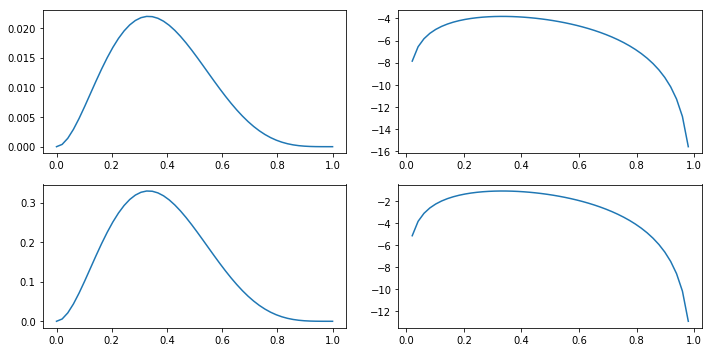

In [59]:
like1 = np.zeros_like(pv)
for i, p in enumerate(pv):
    like1[i] = np.exp(st.bernoulli.logpmf(y, p).sum())
like2 = st.binom.pmf(y.sum(), len(y), pv)

_, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].plot(pv, like1)
ax[0, 1].plot(pv, np.log(like1))
ax[1, 0].plot(pv, like2)
ax[1, 1].plot(pv, np.log(like2))
plt.tight_layout();

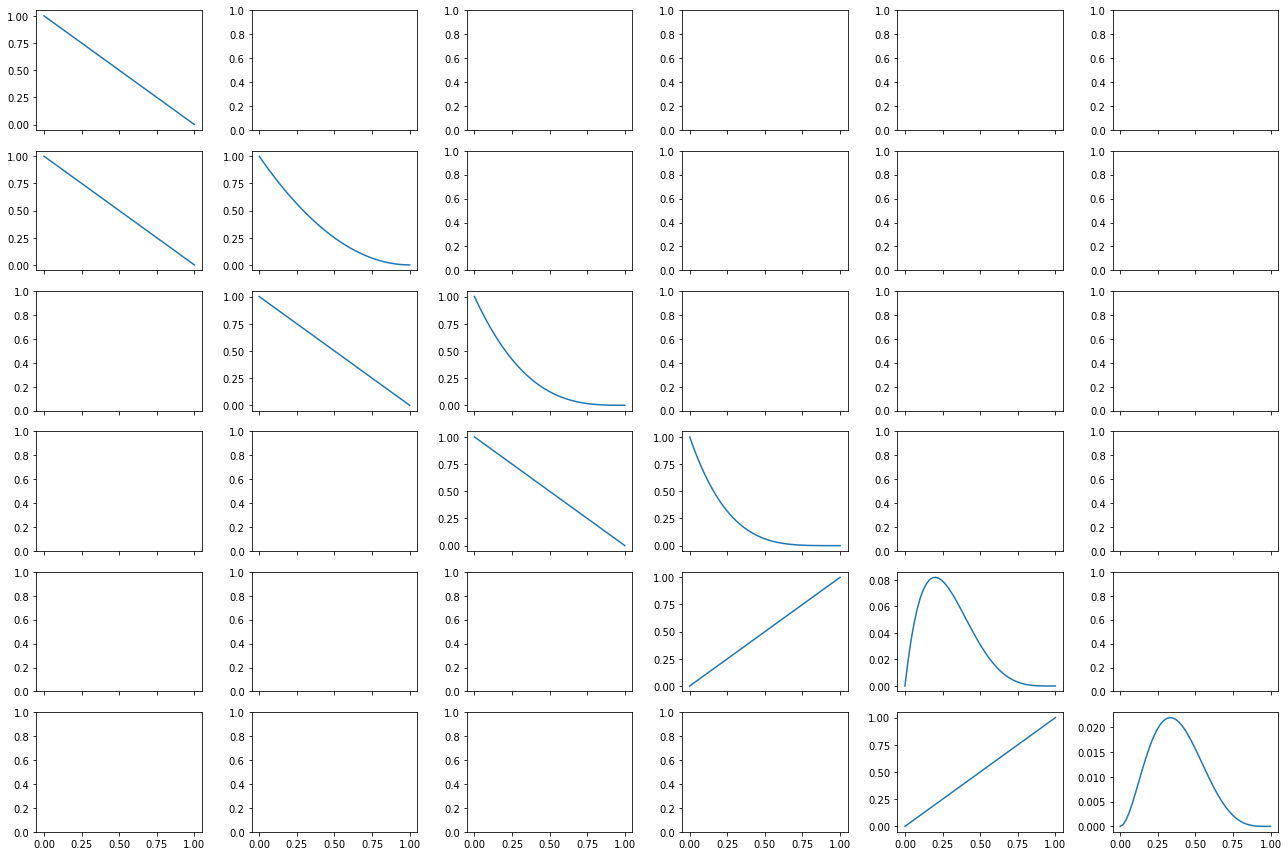

In [68]:
_, ax = plt.subplots(len(y), len(y), figsize=(len(y)*3, len(y)*2), sharex=True)
j = 0
for i, y_ in enumerate(y):
    likei = st.bernoulli.pmf(y_, pv)
    ax[i, j].plot(pv, likei)
    if i>0:
        like_ *= likei
        ax[i, j+1].plot(pv, like_)
        j+=1
    else:
        like_ = likei
    
plt.tight_layout();

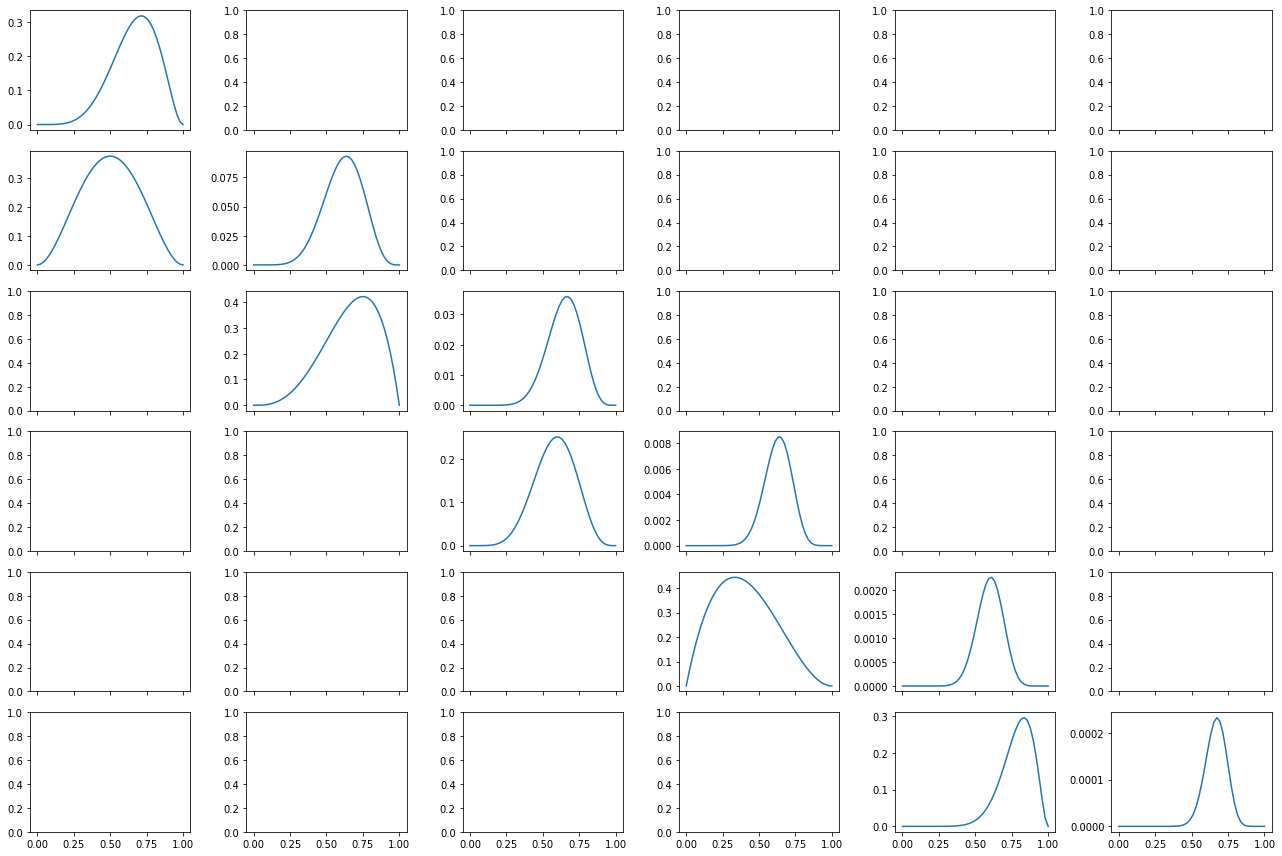

In [69]:
y = np.asarray([5, 2, 3, 6, 1, 10])
n = np.asarray([7, 4, 4, 10, 3, 12])

_, ax = plt.subplots(len(y), len(y), figsize=(
    len(y) * 3, len(y) * 2), sharex=True)
j = 0
for i in range(len(y)):
    likei = st.binom.pmf(y[i], n[i], pv)
    ax[i, j].plot(pv, likei)
    if i > 0:
        like_ *= likei
        ax[i, j + 1].plot(pv, like_)
        j += 1
    else:
        like_ = likei

plt.tight_layout()

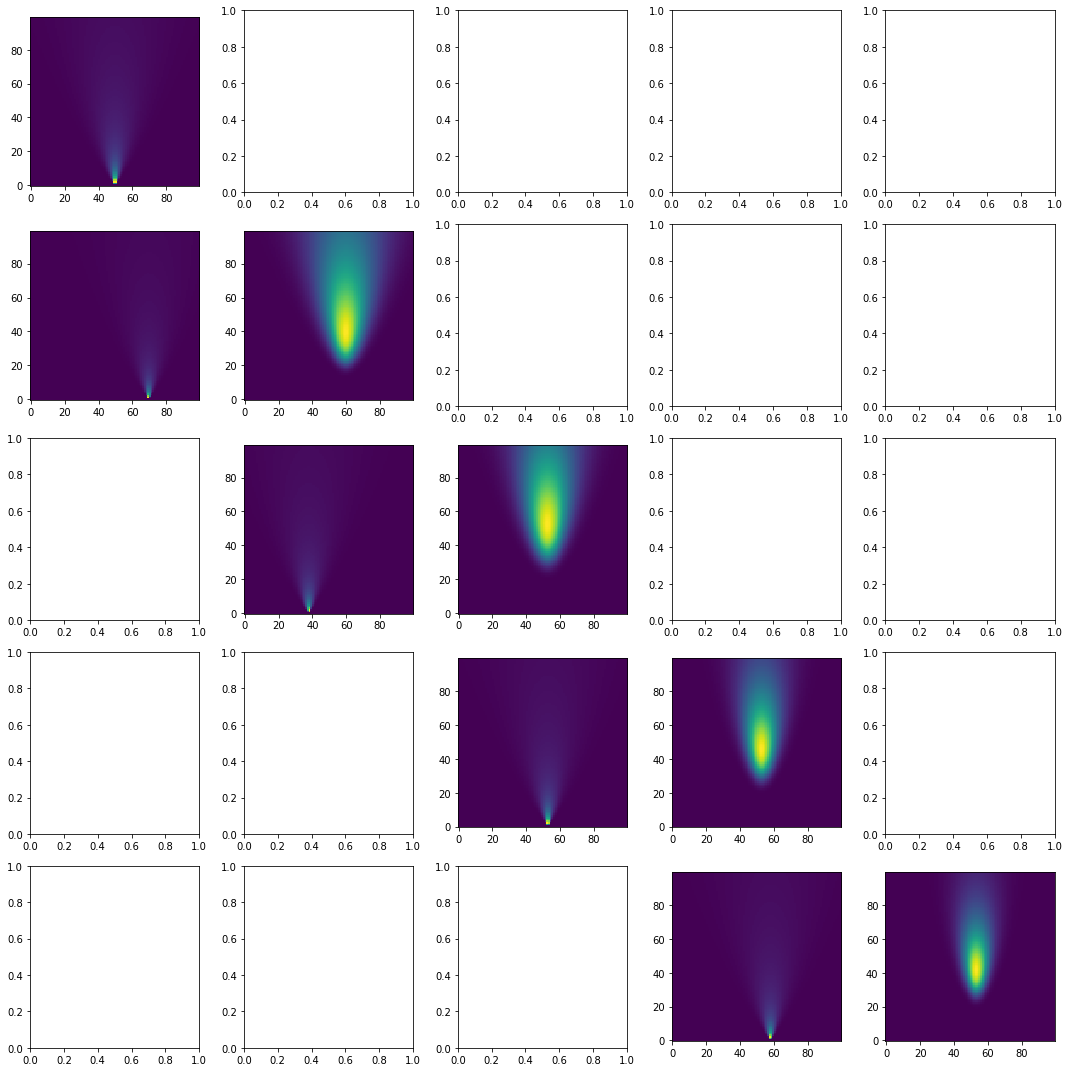

In [86]:
y = np.asarray([0., 2., -1.2, 0.3, .8])
muv2 = np.linspace(-5., 5., 100)
sdv2 = np.linspace(0.001, 2.5, 100)
muv2_, sdv2_ = np.meshgrid(muv2, sdv2)

_, ax = plt.subplots(len(y), len(y), figsize=(
    len(y) * 3, len(y) * 3))
j = 0
for i, obs in enumerate(y):
    likei = st.norm.pdf(obs, muv2_, sdv2_)
    ax[i, j].imshow(likei, origin='lower')
    if i > 0:
        like_ *= likei
        ax[i, j + 1].imshow(like_, origin='lower')
        j += 1
    else:
        like_ = likei

plt.tight_layout();

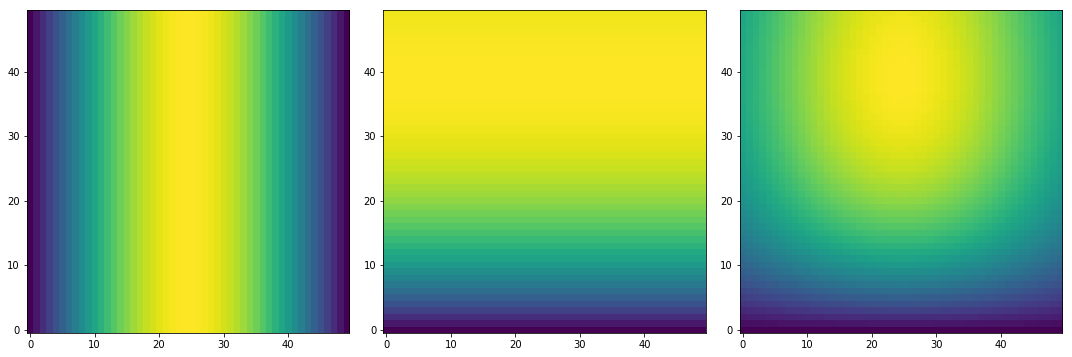

In [122]:
obs = 3.
muv = np.linspace(-5., 5., 50)
sdv = np.linspace(0.001, 2.5, 50)
muv_, sdv_ = np.meshgrid(muv, sdv)
mu_prior = st.norm.pdf(muv_, 0, 5)
sd_prior = st.gamma.pdf(sdv_, 2., scale=1.0 / .5)

_, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(mu_prior, origin='lower')
ax[1].imshow(sd_prior, origin='lower')
prior = mu_prior*sd_prior
ax[2].imshow(prior, origin='lower')
plt.tight_layout()
plt.show()

In [123]:
ll_ = st.norm.pdf(obs, muv_, sdv_)
ll = ll_*prior
df2 = pd.DataFrame(dict(likelihood=ll.flatten(), mu=muv_.flatten(), sd=sdv_.flatten()))
colors = bkpal.viridis(100)
lower_ll, upper_ll = np.percentile(ll.flatten(), [1, 99])
mapper = LinearColorMapper(palette=colors, low=lower_ll, high=upper_ll)
source2 = ColumnDataSource(df2)

In [124]:
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"
fig5 = figure(
    title="Likelihood of mu and sigma in Gaussian",
    plot_height=500,
    plot_width=500,
    tools=TOOLS, toolbar_location='below')

fig5.grid.grid_line_color = None
fig5.axis.axis_line_color = None
fig5.axis.major_tick_line_color = None
fig5.axis.major_label_text_font_size = "5pt"
fig5.axis.major_label_standoff = 0

ax5 = fig5.rect(
    'mu',
    'sd',
    width=(muv[1]-muv[0]) * .99,
    height=(sdv[1]-sdv[0]) * .99,
    source=source2,
    fill_color={'field': 'likelihood',
                'transform': mapper},
    line_color=None)

fig5.select_one(HoverTool).tooltips = [
    ('mu', '@mu'),
    ('sd', '@sd'),
    ('like', '@likelihood'),
]

In [129]:
def update5(obs=2.5):
    ll_ = st.norm.pdf(obs, muv_, sdv_)
    ll = ll_*prior
    ax5.data_source.data['likelihood'] = ll.flatten()

    push_notebook()

In [130]:
show(fig5, notebook_handle=True)
interact(update5, obs=(-10, 10, .01));

interactive(children=(FloatSlider(value=2.5, description='obs', max=10.0, min=-10.0, step=0.01), Output()), _dom_classes=('widget-interact',))

In [44]:
import pymc3 as pm
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [145]:
with pm.Model() as m:
    n = pm.DiscreteUniform('n', 0, nmax)
    p = pm.Uniform('p', 0., 1., transform=None)
    y = pm.Binomial('k', n, p, observed=7)

In [146]:
point = m.test_point
point

{'n': array(12), 'p': array(0.5)}

In [147]:
ll2 = np.zeros_like(ll)
lly = ll2.flatten()
llm = np.zeros_like(lly)

logp_m = m.logp
logp_y = y.logp
for i in range(len(lly)):
    point['n'] = nv_.flatten()[i]
    point['p'] = pv_.flatten()[i]
    llm[i] = np.exp(logp_m(point))
    lly[i] = np.exp(logp_y(point))
llm = llm.reshape(nv_.shape)
lly = lly.reshape(nv_.shape)

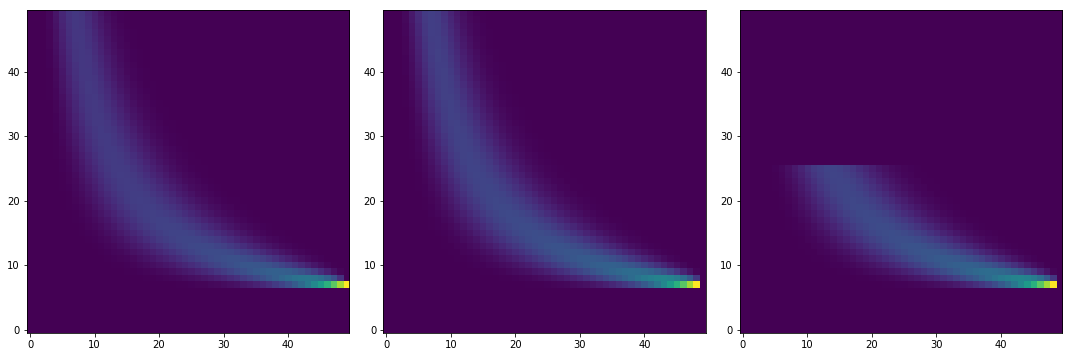

In [148]:
_, ax = plt.subplots(1, 3, figsize=(15, 5))
ll = st.binom.pmf(7, nv_, pv_)
ax[0].imshow(ll, origin='lower')
ax[1].imshow(lly, origin='lower')
ax[2].imshow(llm, origin='lower')
plt.tight_layout()
plt.show()

In [140]:
with pm.Model() as m2:
    n = pm.Uniform('n', 0, nmax)
    p = pm.Uniform('p', 0., 1.)
    y = pm.Binomial('k', n, p, observed=7)
    tr = pm.sample(10000, step=pm.Metropolis())

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_interval__]
>Metropolis: [n_interval__]
100%|██████████| 10500/10500 [00:07<00:00, 1486.08it/s]
The number of effective samples is smaller than 10% for some parameters.


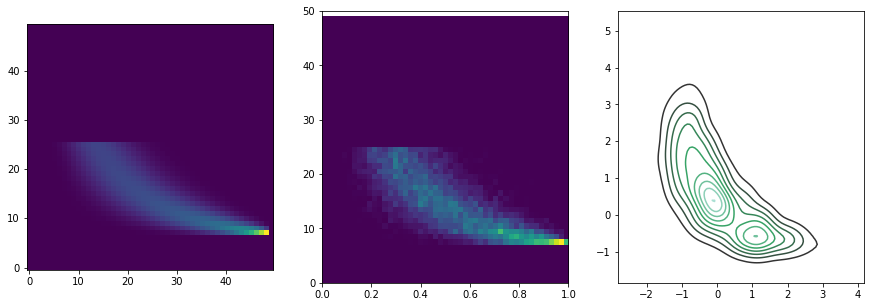

In [150]:
_, ax = plt.subplots(1, 3, figsize=(15, 5))
# ax[0].plot(tr['p'], tr['n'], 'o', color='r', alpha=.05)
ax[0].imshow(llm, origin='lower')
ax[1].hist2d(tr['p'], tr['n'], bins=[pv, nv])
ax[1].set_ylim(0, 50)
sns.kdeplot(tr['p_interval__'][:1000], tr['n_interval__'][:1000], ax=ax[2]);